Speech Signal Analysis
======================



## Introduction



In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Speech is produced by the excitation of the time-varying vocal tract system by a
time-varying source (vibrations of vocal cords). The excitation is generated by
air flow from the lungs carried by the trachea through the vocal cords. As the
acoustic wave passes through the vocal tract, its frequency content (spectrum)
is altered by the resonances of the vocal tract. Vocal tract resonances are
called formants. Thus, the vocal tract shape can be estimated from the spectral
shape (e.g. formant location and spectral tilt) of the speech signal. The speech
produced is an acoustic wave that is recorded, sampled, quantized and stored on
the computer as a sequence of numbers (signal). The speech signal can't be used
directly, as the information is in the sequence of the numbers. So the speech
signal has to be processed and then features relevant to the task have to be
extracted. The extracted features may be related to the voice source, i.e. vocal
cords, like pitch frequency, pitch frequency contour etc. or the vocal tract
system, like linear prediction parameters, cepstral etc. In this laboratory
session, we are going to learn about speech signal processing and extraction of
features related to voice source and vocal-tract system.

We will conduct the following experiments:

1.  In a 2 second speech signal, you will observe that there is more energy in
    speech regions than in non-speech regions.
2.  The speech signal is non-stationary in nature, so it is processed as a
    short-time signal where it is quasi-stationary. In the second experiment, we
    will select a short-time speech signal and estimate the pitch frequency
    manually.
3.  We will observe the autocorrelation of the short-time signal and compute the
    pitch frequency from it.
4.  We will estimate the Fourier spectrum of the short-time signal and also study
    the effect of windowing.
5.  We will study the spectrogram of the speech signal observed in the first experiment.
6.  We will learn about linear prediction analysis and study the vocal-tract response,
    like formants and voice source feature like pitch frequency.
7.  We will perform linear prediction analysis on different speech
    sound signals and observe that they have distinct features.
8.  Although the features are distinctive in nature they can vary, which makes tasks such as
    speech recognition or speaker recognition difficult. Thus we will study
    variability introduced by speakers.
9.  Finally, we will study the pitch contour and the information embedded in it.

The sampling frequency *sf* of all speech signals is 16000 Hz. Every file name
contains information about the gender, speaker, trial number and the sound, for
example the speech signal file `f_s1_t1_a` means it is the vowel /​a/ spoken
by female (`f`), (for male its `m` and child `c`) speaker 1 (`s1`) and trial
number 1 (`t1`).



In [5]:
utterance = "data/f_s1_t1_a"

If you have problems in using any of the functions, use `help` to
know the usage, for example

    help(speech_signal_observation)

will give the usage of the function `speech_signal_observation()`.

Note: The speech files are stored in ascii format so kindly don't edit
or tamper with them. In all the experiments, the usage of the function is
explained and then an example usage is given. Follow the example usage
for now.



## Speech Signal Observation



Plot the 2 second speech utterance using the
`speech_signal_observation()` function and observe the envelope of the
signal. The usage of the function is:



In [6]:
from speech_analysis import *
help(speech_signal_observation)

Help on function speech_signal_observation in module speech_analysis:

speech_signal_observation(filename: str, title: str = 'Speech signal') -> numpy.ndarray
    Load a speech signal from the given file and plot amplitude and log energy.



This plots the speech signal specified with `filename` with an optional title
and returns the speech signal array, for example:



c:\Users\Seifl\Documents\Projects\Speech_Processing\Lab 1\speech_analysis.py:52: RuntimeWarning: invalid value encountered in log10
  log_energy = 10 * np.log10(energy + 10e-3)


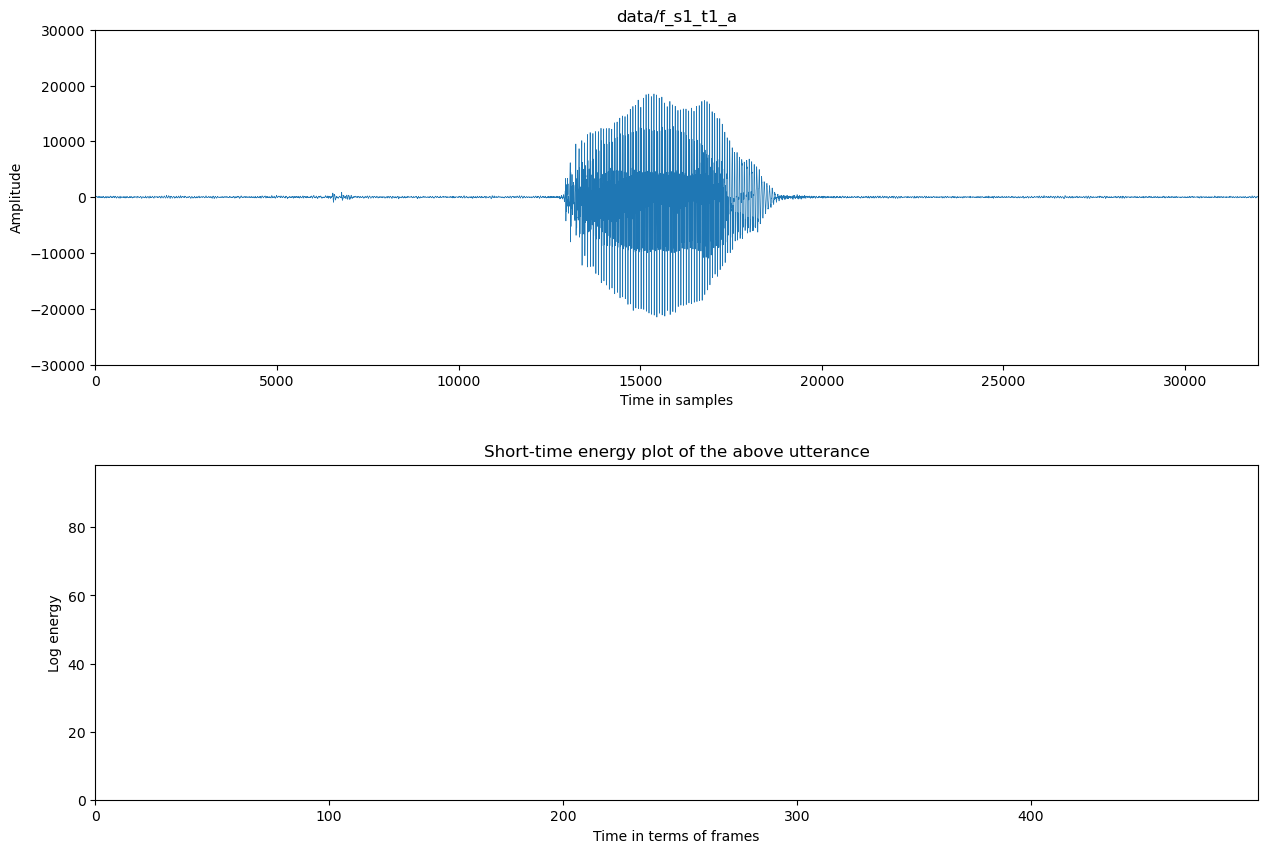

In [7]:
data = speech_signal_observation(utterance, title=utterance)

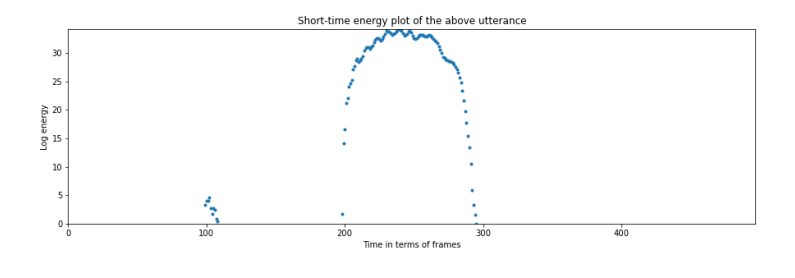


This is supposed to be the log energy of the signal.

The figure shows the speech utterance plotted in the upper part of the figure
and the short-time energy plotted below, which is the envelope of the speech
signal.



## Observation of the Short-Time Speech Signal and Manual Pitch Computation



The speech signal is non-stationary in nature but it can be assumed to be
quasi-stationary for one to three pitch periods (short-time signal). In this
experiment, we are going to observe a short-time speech signal. Select a 30 ms
window from the 2 second speech signal observed in experiment by
using the `select_speech()` function:



In [8]:
help(select_speech)

Help on function select_speech in module speech_analysis:

select_speech(data: numpy.ndarray, begin: int, end: int, title: str = 'Windowed signal') -> numpy.ndarray
    Return a window of the given speech signal and plot it.
    
    The data between frame numbers `begin` (inclusive) and `end` (exclusive) is
    returned.



For example:



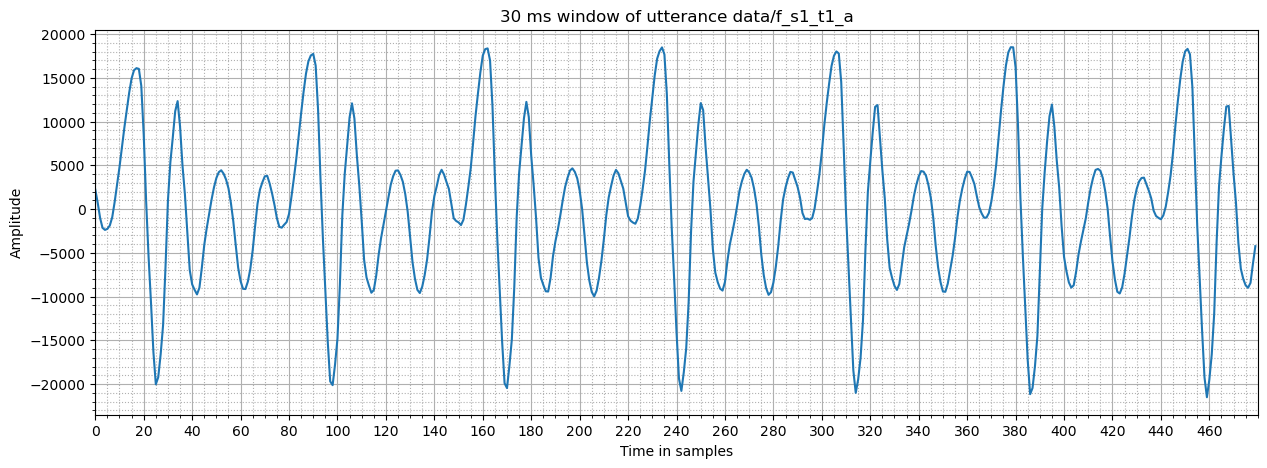

In [9]:
st_data = select_speech(data, 15000, 15480,
                       "30 ms window of utterance " + utterance)

Observe the damped sinusoids repeated periodically. Find the period of
each sinusoid (neglect the sinusoids which are not complete in the
plot) in the following way:

1.  Note down the sample number of the largest peak of each sinusoid.
2.  Find the number of samples between each of the consecutive peaks. It gives
    the period of each sinusoid.

Average these periods to estimate the pitch period, $p_{t}$. Calculate the
fundamental frequency or pitch frequency $F_{0}$ using the following equation
($sf$ *is the sampling frequency*)
$$
\begin{equation}
F_{0} = \frac{sf}{p_{t}}
\end{equation}
$$

+ We have about four sinusoids visually, the first having the largest peak at sample 377, the second having its largest peak at sample 33, the third having its largets peak at sample 196, the fourth having its largest peak at sample 143.
+ We have about four sinusoids: 
    1. The first sinusoid's peak is at sample 17, while the second is at sample 88, giving a period of approximately 71 samples.
    2. The second sinusoid's peak is at sample 33, while the second is at sample 106, giving a period of approximately 73 samples.
    3. The third sinusoid's peak is at sample 52, while the second is at sample 124, giving a period of approximately 72 samples.
    4. The fourth sinusoid's peak is at sample 70, while the second is at sample 143, giving a period of approximately 73 samples.

    Averaging them all, gives a period of about 72 samples, or just $$\frac{16000}{72} = 222\space Hz$$

## Autocorrelation Analysis



In this experiment, we compute the autocorrelation of the short-time
speech signal obtained from the Experiment using the
`autocorrelation()` function:



In [10]:
help(autocorrelation)

Help on function autocorrelation in module speech_analysis:

autocorrelation(data: numpy.ndarray, max_lags: int, title: str = 'Autocorrelation', plot: bool = True) -> numpy.ndarray
    Return and plot the autocorrelation of the given signal.



For example:



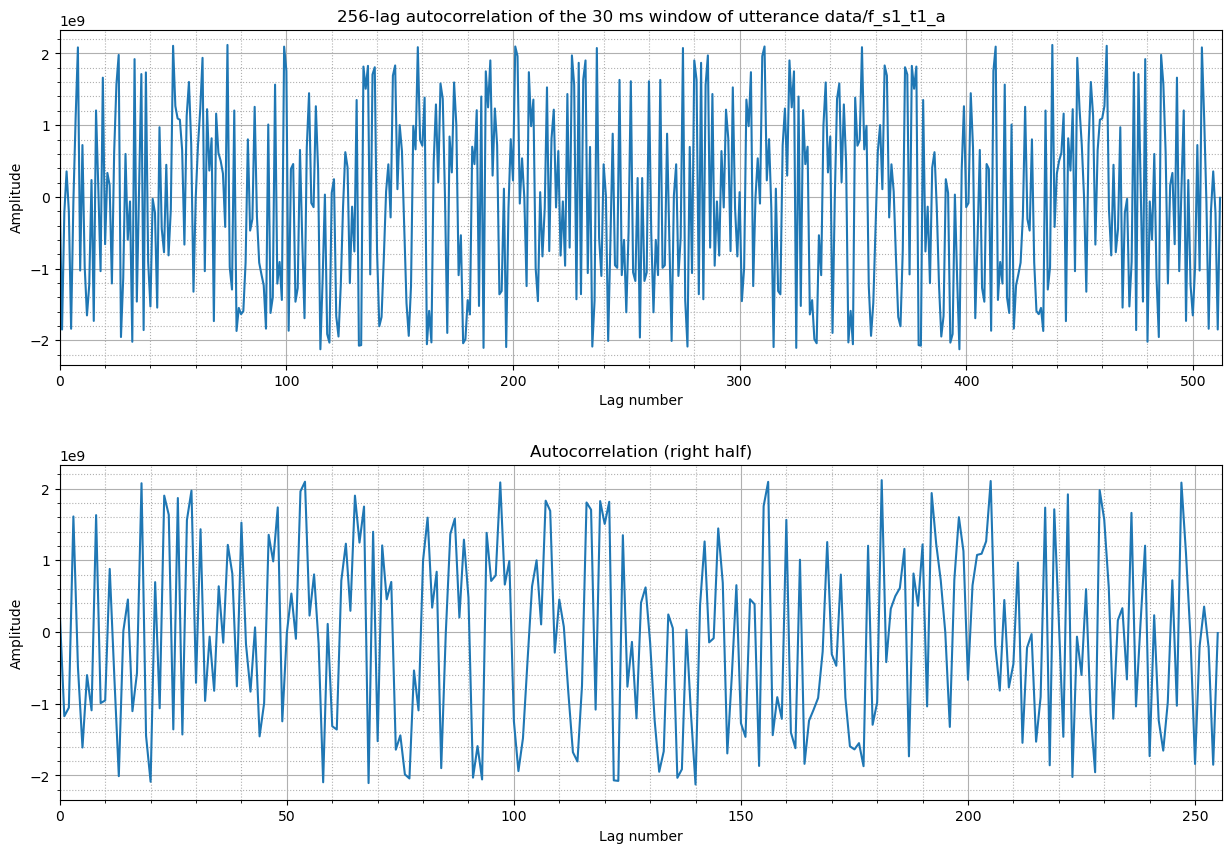

In [11]:
corr_data = autocorrelation(
    st_data, 256,
    "256-lag autocorrelation of the 30 ms window of utterance " + utterance
)

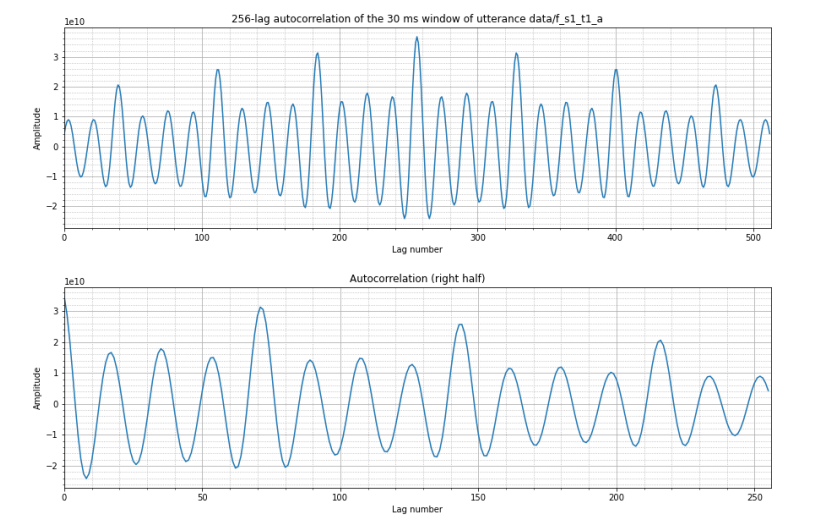

This is supposed to be the autocorrelation of the speech signal.

The length of the autocorrelation array is *lag + lag + 1* which is
symmetric to the point *lag + 1* (for the above example it is 257). The
value at this point is the energy of the short-time signal for which the
autocorrelation was computed. The upper plot shows the actual autocorrelation
(observe the symmetricity) and the plot below shows the right-half symmetry
(i.e. from *lag + 1* to *lag + lag + 1*). Find the second peak in this plot and note
down the lag number, it is the pitch period $p_{t}$. Use equation to
find the fundamental frequency $F_{0}$. Compare it with the $F_{0}$ obtained in
the previous experiment.



+ The second peak is at a lag of (327 - 256) = 71 samples, meaning that the period in samples is 71 samples, using the same equation, we will find $$\frac{16000}{71} = 225\space Hz$$, which is practically the same as before ($222\space Hz$)

## Fourier Spectrum



In this experiment, we compute the Fourier spectrum of the short-time
signal `st_data` obtained in Experiment using the
`fourier_spectrum()` function:



In [12]:
help(fourier_spectrum)

Help on function fourier_spectrum in module speech_analysis:

fourier_spectrum(data: numpy.ndarray, order: int = 512, sf: int = 16000, title: str = 'Fourier spectrum') -> None
    Computes and plots the fourier spectrum of the given signal.



It computes the DFT of order `order` of the short-time signal `data`. The order
of the DFT is generally chosen such that it is a $2^{n}$ value to take advantage
of the FFT routine. Depending upon the number of samples, select the order of
FFT which is near to it, for example the 30 ms window we are using has 480
samples, so we select an order of 512:



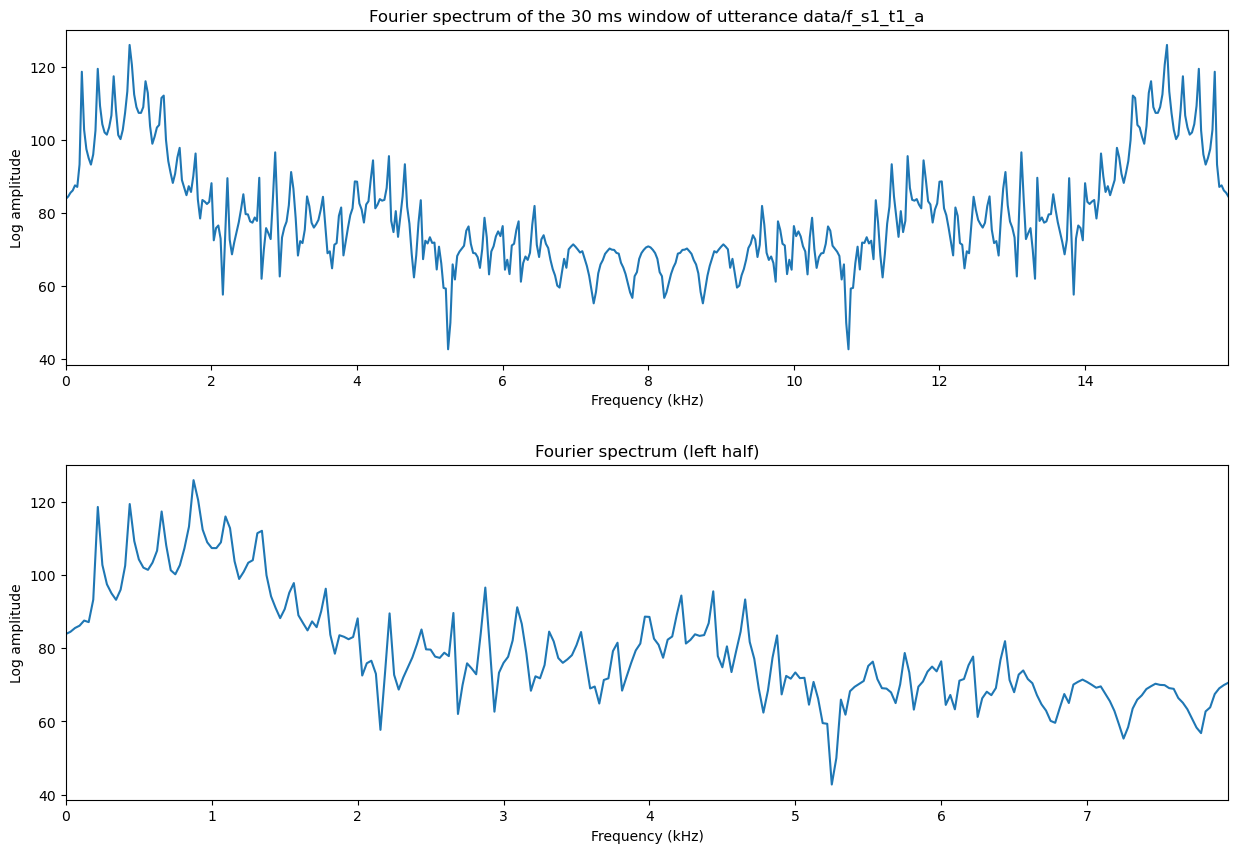

In [13]:
fourier_spectrum(
    st_data, 512,
    title="Fourier spectrum of the 30 ms window of utterance " + utterance
)

The upper plot shows the 512-point DFT spectrum (observe the symmetricity) and
the plot below shows the left symmetry of the plot (from point 1 to 256).
Observe the spectral peaks, which are the formants (resonances in the vocal
tract). The 512-point range covers the entire sampling frequency range, i.e.
16000 Hz, which has redundant information, whereas the plot below covers half of
the sampling frequency, i.e. 8000Hz, which is the region of interest (recall the
sampling theorem).



### Windowed Speech Analysis



Window the short-time speech signal `st_data` with the Hanning window:



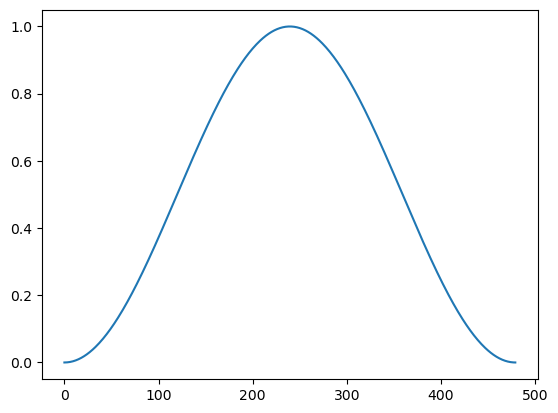

In [14]:
import matplotlib.pyplot as plt
hanning_window = np.hanning(len(st_data))
plt.plot(hanning_window)
st_data_hanning = st_data * hanning_window

Compute the Fourier spectrum for the windowed short-time signal
`st_data_hanning`. Observe the difference in the Fourier spectrum of the signal
`st_data` using a rectangular window (which was implicit when we created it in
Experiment ) and the signal `st_data_hanning` using the Hanning
window.



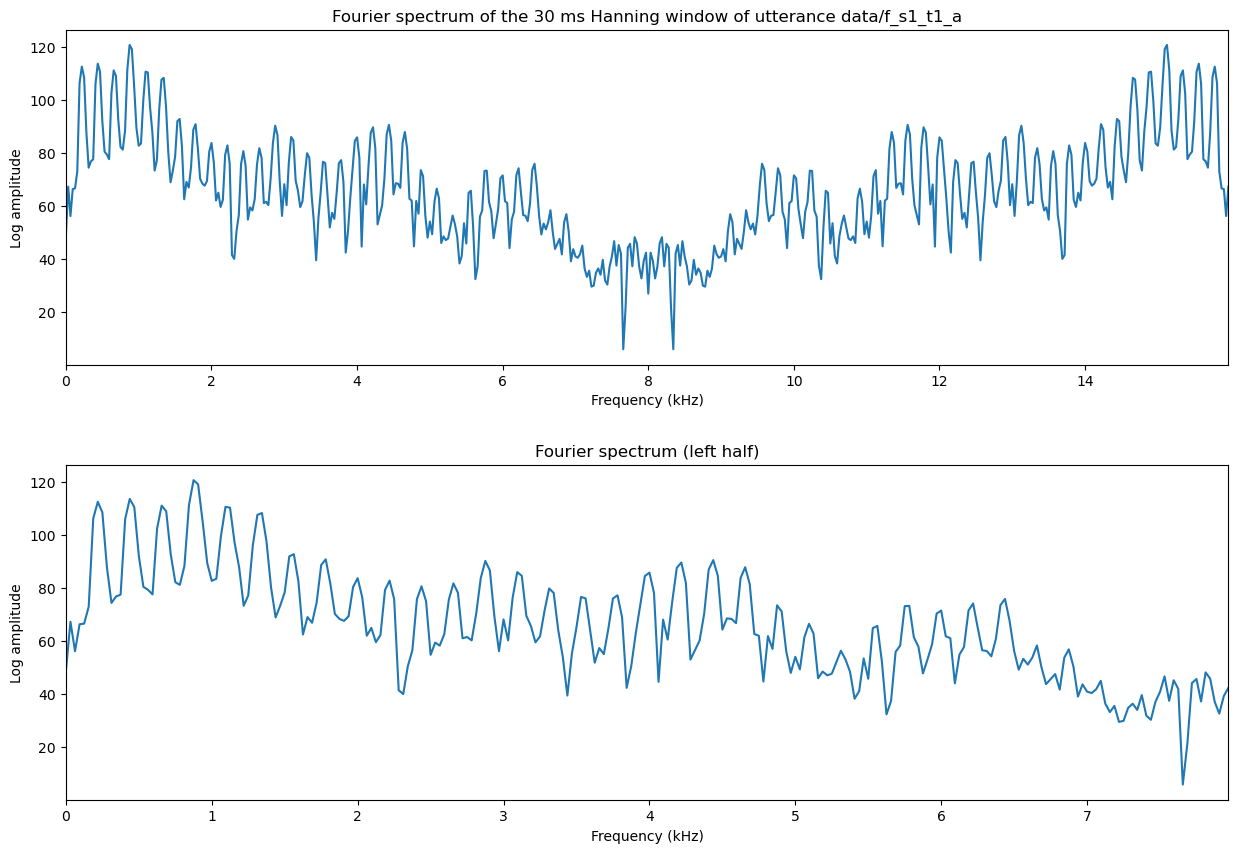

In [15]:
fourier_spectrum(
    st_data_hanning, 512,
    title="Fourier spectrum of the 30 ms Hanning window of utterance " + utterance
)

- Having a rectangle function as a window has its difference compared to having a hamming function as a window. The peaks for the rectangle-windowed signal will be much more spiked, perfect-peaked. While for the hamming-windowed signal, it will be like this one, more smooth, broader. Note than the peaks will be the same, at the same locations (aka. frequencies).

## Spectrogram



In this experiment we are going to compute the narrow-band and
wide-band spectrogram of the entire utterance i.e. the signal `data`
obtained in Experiment . Recall that in the
wide-band spectrogram we get good time
resolution and in the narrow-band spectrogram we get good frequency resolution. The
spectrogam is computed using the `spectrogram()` function:



In [16]:
help(spectrogram)

Help on function spectrogram in module speech_analysis:

spectrogram(data: numpy.ndarray, order: int, window: Union[Callable[[int], numpy.ndarray], NoneType] = <function hanning at 0x00000222B34FC0D0>, sf: int = 16000, title='Spectrogram') -> None
    Compute and plot the spectrogram of the given signal.



The type of spectrogram depends upon the order `order`. For a wide-band
spectrogram we need a small window and choose order 256 or 128, which is a
short duration. For a narrow-band spectrogram we choose order 1024 or
2048, which is a long duration, so we loose the time resolution. The function
uses the Hanning window internally.



### Wide-band Spectrogram

For the formants $f_1$, $f_2$, etc...



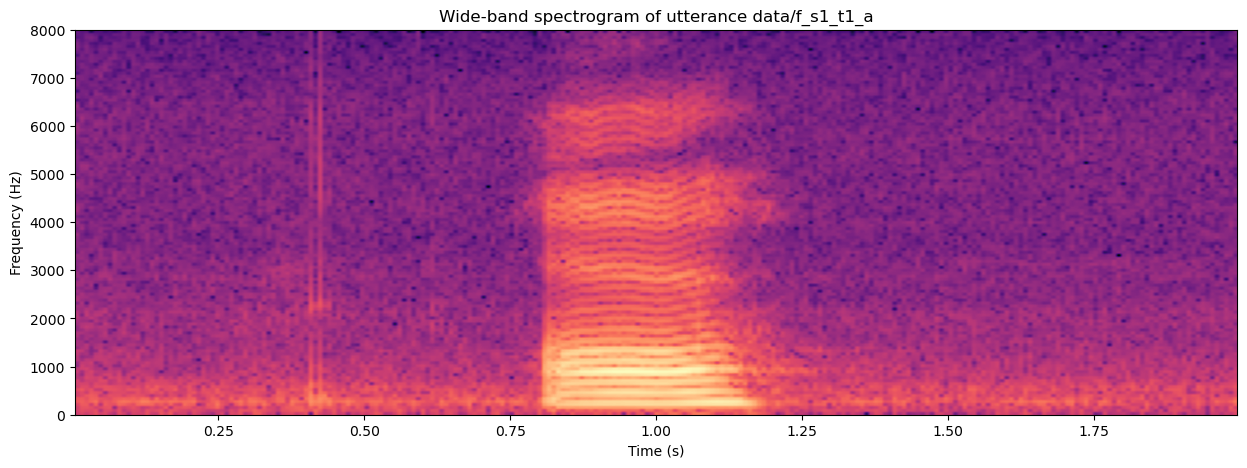

In [17]:
spectrogram(data, 256, title="Wide-band spectrogram of utterance " + utterance)

### Narrow-band Spectrogram

For the pitch, $F_0$, and whole multiples of it.

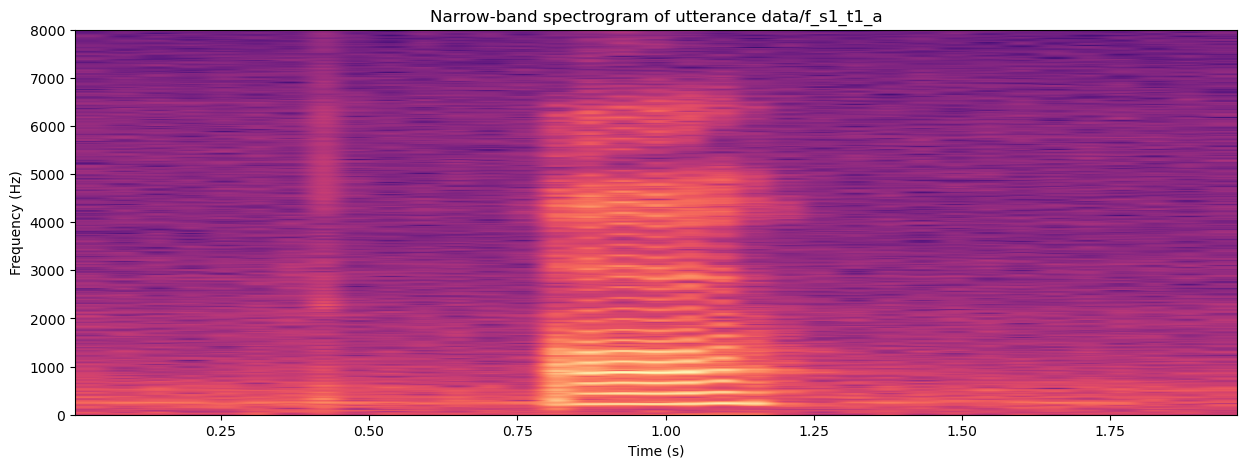

In [18]:
spectrogram(data, 1024, title="Narrow-band spectrogram of utterance " + utterance)

## Linear Prediction (LP) Analysis



Linear prediction is the most common technique to estimate the
shape of the vocal tract. A $p\text{-th}$ order linear prediction expresses
every sample as the linear weighted sum of the past $p$ samples. The
resulting difference equation expressed in the $z\text{-domain}$ is

$$
H(z) = \frac{1}{1 - \sum_{j = 1}^{p} a_{j}z^{-j}}
$$

The idea behind
linear prediction analysis is to estimate the $p$ $a_{k}\text{-s}$
that minimize the mean-square error of the prediction. The linear
prediction error is also called LP residual. The $a_{k}\text{-s}$
determine the solution of the equation. The solution of the equation
in the denominator is called pole. A real pole determines the spectral
roll-off and a complex pole (which always exists with a conjugate)
determines the location of the formant in the LP spectrum. The LP
spectrum is the Fourier transform of the $a_{k}\text{-s}$.



### LP Spectrum



In this experiment, we will observe the LP spectrum of the short-time
speech signal obtained from Experiment using
the function `lp_spectrum()`:



In [1]:
help(lp_spectrum)

`lp_order` is the linear prediction order $p$. The default `window` function is
the Hanning window. `order` is the FFT order needed to compute the linear
prediction spectrum from the $a_{k}\text{-s}$. For example:



In [1]:
lp_order = 14
_ = lp_spectrum(st_data, lp_order, 512)

In the figure, you will observe two plots. The upper plot is
the Fourier spectrum and the lower plot is the linear prediction spectrum.
Observe the more prominent spectral peaks (formants) in the linear prediction spectrum compared
to the Fourier spectrum. Note down the frequency of each peak, then go back to
the wide-band spectrogram from Experiment and observe
that the energy is indeed high near that spectral frequency. Now change the linear prediction
order `lp_order` to, say 1, 3, 16, 20, 30, 50 and observe the changes in
the LP spectrum. Try to reason about it.



### LP Residual



In this experiment we will perform linear
prediction analysis and compute the LP residual of the short-time speech signal
obtained from Experiment with the `lp_residual()` function:



In [1]:
help(lp_residual)

For example:



In [1]:
lp_order = 10
residual = lp_residual(st_data, lp_order)

1.  Note down the sample number of the largest peak of each sinusoid in
    the upper plot.
2.  Note down the sample number of the corresponding peaks in the LP residual.
3.  Compare these two observations. Are they the same?

Perform an autocorrelation analysis on the residual signal using
the `autocorrelation()` function and find the pitch period as it was done
in Experiment :



In [1]:
_ = autocorrelation(residual, 256, title="Autocorrelation of the LP residual")

## LP Spectrum of Different Speech Sounds



In Experiment , we studied the LP spectrum of a short-time signal. In
this experiment, we are going to study the LP spectra of different vowels. Note
down your observations.



### /​a/



In [1]:
st_data_a = load_signal("data/m_s2_t1_a")[9000:9480]
_ = lp_spectrum(st_data_a, 16, 512)

### /​e/



In [1]:
st_data_e = load_signal("data/m_s2_t1_e")[8000:8480]
_ = lp_spectrum(st_data_e, 16, 512)

### /​i/



In [1]:
st_data_i = load_signal("data/m_s2_t1_i")[14000:14480]
_ = lp_spectrum(st_data_i, 14, 512)

### /​o/



In [1]:
st_data_o = load_signal("data/m_s2_t1_o")[12000:12480]
_ = lp_spectrum(st_data_o, 18, 512)

### /​u/



In [1]:
st_data_u = load_signal("data/m_s2_t1_u")[17000:17480]
_ = lp_spectrum(st_data_u, 18, 512)

## Intra- and Inter-Speaker Variability



In Experiments and , we studied the effect of order on linear
  prediction and also observed that for different sounds the formants are
  different. In this experiment, we are going to analyse the variability caused
  by speakers. There are two kinds of speaker variability that are of interest:

1.  **Intra-speaker variability** is the
    variability introduced by the same speaker while producing the same sound
    repeatedly.
2.  **Inter-speaker variability** is the variability introduced by
    different speakers producing the same sound.

This can be useful depending upon the type of application, such as in speech
recognition it is good if there is no speaker variability, whereas, for speaker
recognition inter-speaker variability is very important. Intra-speaker
variability is neither useful for speech recognition nor for speaker recognition
applications.



### Intra-Speaker Variability



For this experiment we use 3 utterances of the same sound /​a/ spoken by the
same speaker 3 different times. We will use the `speaker_variation()` function,
which takes the utterance file names and their corresponding starting points
defining the short-time signal. A length of 480 samples for the short-time
signal is assumed by default.



In [1]:
help(speaker_variation)

For example:



In [1]:
speaker_variation([("data/f_s2_t1_a", 14000),
                   ("data/f_s2_t2_a", 10000),
                   ("data/f_s2_t3_a", 12480)])

This computes the LP spectrum of the short-time signal of all 3 utterances and
plots them in the same figure. Observe that the first two formant regions for all
3 utterances are almost the same, while this is not the case for higher formants.



### Inter-Speaker Variability



Next, we take 3 utterances of the sound /​a/ spoken by a female, male and a child.



In [1]:
speaker_variation([("data/f_s1_t1_a", 15000),
                   ("data/m_s2_t1_a", 9000),
                   ("data/c_s1_t1_a", 12480)])

Again observe that the first two formant regions for the male and female speaker
are almost the same. In case of child speech the second formant shifted much
more than the first formant. Like in the previous experiment we observe that the
higher formant regions are different for different speakers even though the same
sound /​a/ is being spoken.



## SIFT Algorithm and Pitch Contour



In this experiment, we extend the idea of pitch estimation using the LP residual
(see Experiment ) into a pitch estimation algorithm. The pitch frequency
can be estimated through the Simple Inverse Filter Tracking (SIFT) algorithm. It
computes the pitch frequency for a given short-time speech signal in the following
way:

1.  Low-pass-filter the short-time signal.
2.  Perform LP analysis and obtain the LP residual.
3.  Perform autocorrelation on the LP residual.
4.  Find the location of the second peak, make a decision on voicing. If voiced, compute
    the pitch frequency, else set the pitch frequency to zero.

The pitch frequency contour for a spoken sentence can be computed by taking a
short-time window of, for example, size 30 ms:

1.  Place this window at the beginning of the speech signal and compute the pitch
    frequency using the SIFT algorithm.
2.  Shift the window by 10 ms and compute the pitch frequency using the SIFT algorithm.
3.  Repeat step 2 until the end of the speech signal is reached.

The 10 ms shift is called a **frame**. So we obtain a pitch frequency for every 10
ms or every frame. The pitch contour is nothing but the array of pitch
frequencies obtained for the sequence of frames. For applications like speech or
speaker recognition, for every frame a feature parameter vector (e.g. LP
coefficients) is obtained. In other words, the feature extraction stage yields a
sequence of feature parameter vectors $x_1, x_2 \cdots x_{N-1}, x_N$, where $N$
is the number of frames.

In this experiment, first, we are going to observe the pitch contour
for two different types of sentences, interrogative and declarative,
using the `sift()` function:



In [1]:
help(sift)

For this study, we will use a 30 ms frame size (480 samples), a shift of 10 ms
(160 samples) and a linear prediction order of 10.



In [1]:
lp_order = 10
frame_size = 480
frame_shift = 160

The sentence spoken is an interrogative sentence, *"Where are you from?"*:



In [1]:
_ = sift("data/m_s1_i_sen1", lp_order, frame_size, frame_shift)

In this plot you see the speech signal and its pitch contour below. Observe the
rise and fall of the pitch contour across the sentence. This rise and fall of
pitch contour carries information like speaking style, type of sentence,
emotional status of the speaker etc. Observe the rise of the pitch contour for
the word *where* at the beginning of the sentence (in the context of
interrogation). If a line is drawn interpolating the peaks and valleys in the
pitch contour, it will have a positive slope. Observe at the end again a fall
and then a rise of the pitch contour.

In interrogation sentences, the slope will be more pointing up if we fit a line.

The next sentence is a declarative sentence, *"I am from India"*:



In [1]:
_ = sift("data/m_s1_d_sen1", lp_order, frame_size, frame_shift)

Observe the rise and fall of pitch contour across the sentence. If a line is
drawn interpolating the peaks and valleys in this pitch contour, it will have a
negative slope.

Note that the pitch frequency for a single frame is just an information about
the speaker. It doesn't convey any information regarding the sentence being
spoken or its message or the emotional status of speaker. But when a longer
duration (say 100-300 ms), i.e. a sequence of frames, is considered then we can
observe the rise and fall of the pitch contour and derive such information.
Still, the pitch contour does not convey any information regarding the message
being spoken.

In declarative sentences, the slope will be more pointing down if we fit a line.

Now we will perform the pitch contour analysis on the same sentences spoken by a
different speaker:



In [1]:
_ = sift("data/m_s2_i_sen1", lp_order, frame_size, frame_shift)

In [1]:
_ = sift("data/m_s2_d_sen1", lp_order, frame_size, frame_shift)

Compare these pitch contours to those of the previous speaker who spoke the
same sentences. Are they different?  Human efficiently use the
speaking style information which is embedded in the pitch contour to
recognize another person.



## Acknowledgements



This lab was originally developed in Matlab for the *Speech Processing and
Speech Recognition* course at École polytechnique fédérale de Lausanne (EPFL).

